In [71]:
import numpy as np
import pandas as pd
import pickle as pkl

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [53]:
df = pd.read_csv('Sample 14days_food_preparation_Cleaned.csv')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Merchant_lat                                                10000 non-null  float64
 1   Merchant_lon                                                10000 non-null  float64
 2   NationFoodCategory_sin                                      10000 non-null  float64
 3   NationFoodCategory_cos                                      10000 non-null  float64
 4   FoodCategories_sin                                          10000 non-null  float64
 5   FoodCategories_cos                                          10000 non-null  float64
 6   riderInitial_to_Merchant_EucDistance                        10000 non-null  float64
 7   riderInitial_to_Merchant_ShortestDistance                   10000 non-null  float64
 8

In [55]:
df.head()

,Merchant_lat,Merchant_lon,NationFoodCategory_sin,NationFoodCategory_cos,FoodCategories_sin,FoodCategories_cos,riderInitial_to_Merchant_EucDistance,riderInitial_to_Merchant_ShortestDistance,day_of_week_sin,day_of_week_cos,calledMerchantTime_to_arrivedAtMerchantTime_prediction (s),calledMerchantTime_to_arrivedAtMerchantTime_prediction (m),duration (s),duration (m)
0,13.825703,100.559309,0.000000,1.00000,0.000000,1.000000,793.928285,3393.191,-0.974928,-0.222521,401.262823,6.687714,507.0,8.450000
1,13.831056,100.570731,0.000000,1.00000,0.294755,0.955573,1621.210851,2350.873,0.433884,-0.900969,633.470806,10.557847,1758.0,29.300000
2,13.827205,100.536048,0.000000,1.00000,0.563320,0.826239,1969.074840,3193.337,0.433884,-0.900969,636.793739,10.613229,860.0,14.333333
3,13.840180,100.542326,0.781831,0.62349,0.781831,0.623490,2764.603123,3610.225,-0.974928,-0.222521,868.961712,14.482695,1542.0,25.700000
4,13.827034,100.564534,0.000000,1.00000,0.930874,0.365341,317.267557,249.565,0.781831,0.623490,401.262823,6.687714,389.0,6.483333


# 3. select features and split data (test/train)

In [56]:
pred_s = df['calledMerchantTime_to_arrivedAtMerchantTime_prediction (s)'].copy()
pred_m = df['calledMerchantTime_to_arrivedAtMerchantTime_prediction (m)'].copy()
X = df.drop(['calledMerchantTime_to_arrivedAtMerchantTime_prediction (s)',
             'calledMerchantTime_to_arrivedAtMerchantTime_prediction (m)',
             'duration (s)',
             'duration (m)'], axis=1)
X.loc[X['riderInitial_to_Merchant_ShortestDistance'] <= X['riderInitial_to_Merchant_EucDistance'], 'riderInitial_to_Merchant_ShortestDistance'] \
  = X.loc[X['riderInitial_to_Merchant_ShortestDistance'] <= X['riderInitial_to_Merchant_EucDistance'], 'riderInitial_to_Merchant_EucDistance']
y_s = df['duration (s)']
y_m = df['duration (m)']

In [57]:
X.head()

,Merchant_lat,Merchant_lon,NationFoodCategory_sin,NationFoodCategory_cos,FoodCategories_sin,FoodCategories_cos,riderInitial_to_Merchant_EucDistance,riderInitial_to_Merchant_ShortestDistance,day_of_week_sin,day_of_week_cos
0,13.825703,100.559309,0.000000,1.00000,0.000000,1.000000,793.928285,3393.191000,-0.974928,-0.222521
1,13.831056,100.570731,0.000000,1.00000,0.294755,0.955573,1621.210851,2350.873000,0.433884,-0.900969
2,13.827205,100.536048,0.000000,1.00000,0.563320,0.826239,1969.074840,3193.337000,0.433884,-0.900969
3,13.840180,100.542326,0.781831,0.62349,0.781831,0.623490,2764.603123,3610.225000,-0.974928,-0.222521
4,13.827034,100.564534,0.000000,1.00000,0.930874,0.365341,317.267557,317.267557,0.781831,0.623490


In [82]:
Xs = pd.concat([X, pred_s], axis=1)
Xm = pd.concat([X, pred_m], axis=1)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, y_s, test_size=0.20, random_state=0)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, y_m, test_size=0.20, random_state=0)

In [83]:
# Xs_train, Xs_test, ys_train, ys_test = train_test_split(X, y_s, test_size=0.20, random_state=0)
# Xm_train, Xm_test, ym_train, ym_test = train_test_split(X, y_m, test_size=0.20, random_state=0)

# 4. train models

## 4.1 lr

In [84]:
lr_s = LinearRegression()
lr_s.fit(Xs_train, ys_train)
lr_predictions_s = lr_s.predict(Xs_test)

lr_m = LinearRegression()
lr_m.fit(Xm_train, ym_train)
lr_predictions_m = lr_m.predict(Xm_test)

## 4.2 rf

In [85]:
rf_s = RandomForestRegressor()
rf_s.fit(Xs_train, ys_train)
rf_predictions_s = rf_s.predict(Xs_test)

rf_m = RandomForestRegressor()
rf_m.fit(Xm_train, ym_train)
rf_predictions_m = rf_m.predict(Xm_test)

## 4.3 gbdt

In [86]:
gbdt_s = GradientBoostingRegressor()
gbdt_s.fit(Xs_train, ys_train)
gbdt_predictions_s = gbdt_s.predict(Xs_test)

gbdt_m = GradientBoostingRegressor()
gbdt_m.fit(Xm_train, ym_train)
gbdt_predictions_m = gbdt_m.predict(Xm_test)

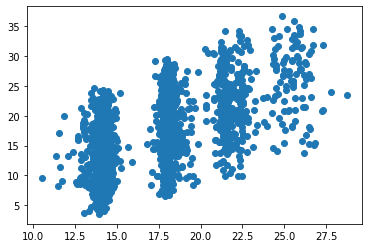

In [87]:
import matplotlib.pyplot as plt

plt.scatter(gbdt_predictions_m, ym_test)

# 5. Evaluate

## 5.1 create evaluate function

In [88]:
def evaluate(y_pred, y_test):
    MAE  = metrics.mean_absolute_error(y_pred, y_test)
    MSE  = metrics.mean_squared_error(y_pred, y_test)
    R2   = metrics.r2_score(y_pred, y_test)
    RMSE = np.sqrt(metrics.mean_squared_error(y_pred, y_test))

    return MAE, MSE, R2, RMSE

In [89]:
pd.DataFrame({'pred':gbdt_predictions_m, 'actual':ym_test})

,pred,actual
9394,18.941533,17.066667
898,13.123075,18.800000
2398,25.604381,22.983333
5906,22.500966,20.383333
2343,17.773812,19.783333
...,...,...
1037,17.818269,21.000000
2899,14.054065,19.966667
9549,18.280506,18.783333
2740,25.488279,25.300000


## 5.2 evaluate all model

In [75]:
lr_metrics_s = evaluate(lr_predictions_s, ys_test)
rf_metrics_s = evaluate(rf_predictions_s, ys_test)
gbdt_metrics_s = evaluate(gbdt_predictions_s, ys_test)

lr_metrics_m = evaluate(lr_predictions_m, ym_test)
rf_metrics_m = evaluate(rf_predictions_m, ym_test)
gbdt_metrics_m = evaluate(gbdt_predictions_m, ym_test)

## 5.3 benchmark on dataframe

In [76]:
data_dict_s = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MAE': [lr_metrics_s[0], rf_metrics_s[0], gbdt_metrics_s[0]],
    'MSE': [lr_metrics_s[1], rf_metrics_s[1], gbdt_metrics_s[1]],
    'R2': [lr_metrics_s[2], rf_metrics_s[2], gbdt_metrics_s[2]],
    'RMSE': [lr_metrics_s[3], rf_metrics_s[3], gbdt_metrics_s[3]]
}

data_dict_m = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MAE': [lr_metrics_m[0], rf_metrics_m[0], gbdt_metrics_m[0]],
    'MSE': [lr_metrics_m[1], rf_metrics_m[1], gbdt_metrics_m[1]],
    'R2': [lr_metrics_m[2], rf_metrics_m[2], gbdt_metrics_m[2]],
    'RMSE': [lr_metrics_m[3], rf_metrics_m[3], gbdt_metrics_m[3]]
}

In [77]:
benchmark_s = pd.DataFrame(data_dict_s)
benchmark_s

,Model,MAE,MSE,R2,RMSE
0,Linear Regression,262.267639,98889.443847,-1.675602,314.466920
1,Random Forest,269.590080,106417.924085,-1.154601,326.217602
2,Gradient Boosting,257.997823,95098.165718,-1.375209,308.379905


In [78]:
benchmark_m = pd.DataFrame(data_dict_m)
benchmark_m

,Model,MAE,MSE,R2,RMSE
0,Linear Regression,4.371127,27.469290,-1.675602,5.241115
1,Random Forest,4.472441,29.355862,-1.117559,5.418105
2,Gradient Boosting,4.299486,26.411467,-1.377847,5.139209


## 5.4 save all data

In [19]:
result_s = pd.DataFrame({
    'ys_test': ys_test,
    'lr_predictions_s': lr_predictions_s,
    'rf_predictions_s': rf_predictions_s,
    'gbdt_s': gbdt_predictions_s
})
result_m = pd.DataFrame({
    'ym_test': ym_test,
    'lr_predictions_m': lr_predictions_m,
    'rf_predictions_m': rf_predictions_m,
    'gbdt_m': gbdt_predictions_m
})

In [ ]:
# benchmark_s.to_csv('model_benchmark_metrics_s.csv', index=False)
# benchmark_m.to_csv('model_benchmark_metrics_m.csv', index=False)
# result_s.to_csv('model_benchmark_result_s.csv', index=False)
# result_m.to_csv('model_benchmark_result_m.csv', index=False)

# 6. Hyperparameter tuning

## 6.1 get best model params and feats importance

In [ ]:
gbdt_s.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
gbdt_m.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
def get_feature_importance(model, X):
    return pd.DataFrame([[round(float(x),6) for x in model.feature_importances_]], columns=X.columns.to_list())

In [ ]:
get_feature_importance(gbdt_s, Xs_train)

,u_lat,u_lon,v_lat,v_lon,euc_dist,shortest_dist,day_of_week_sin,day_of_week_cos
0,0.000362,0.000449,0.001168,0.000943,0.995379,0.001392,0.00019,0.000118


In [ ]:
get_feature_importance(gbdt_m, Xm_train)

,u_lat,u_lon,v_lat,v_lon,euc_dist,shortest_dist,day_of_week_sin,day_of_week_cos
0,0.000349,0.000425,0.001163,0.000947,0.995429,0.001405,0.000163,0.000118


## 6.2 tune params using gridsearchCV

In [ ]:
gbdt = GradientBoostingRegressor(random_state=0)

param_grid = { 
 "n_estimators": [30, 35, 40, 45, 50, 55, 60, 65, 70],
 "max_features": [1.0, "sqrt", "log2"], # "auto" is deprecated, use 1.0 instead
 "max_depth": [2, 3, 4, 5],
}
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2', 'neg_root_mean_squared_error']
refit = "neg_mean_absolute_error"

CV_gbdt_s = GridSearchCV(estimator=gbdt, param_grid=param_grid, scoring=scoring, refit=refit)
CV_gbdt_s.fit(Xs_train, ys_train)

GridSearchCV(estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_features': [1.0, 'sqrt', 'log2'],
                         'n_estimators': [30, 35, 40, 45, 50, 55, 60, 65, 70]},
             refit='neg_mean_absolute_error',
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2',
                      'neg_root_mean_squared_error'])

In [ ]:
# pkl.dump(CV_gbdt_s, open("food_delivery_CV_gbdt_s.pkl", "wb"))

In [ ]:
CV_gbdt_s.best_params_

{'max_depth': 3, 'max_features': 1.0, 'n_estimators': 45}

In [ ]:
pd.DataFrame(CV_gbdt_s.cv_results_).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   mean_fit_time                            108 non-null    float64
 1   std_fit_time                             108 non-null    float64
 2   mean_score_time                          108 non-null    float64
 3   std_score_time                           108 non-null    float64
 4   param_max_depth                          108 non-null    object 
 5   param_max_features                       108 non-null    object 
 6   param_n_estimators                       108 non-null    object 
 7   params                                   108 non-null    object 
 8   split0_test_neg_mean_absolute_error      108 non-null    float64
 9   split1_test_neg_mean_absolute_error      108 non-null    float64
 10  split2_test_neg_mean_absolute_error      108 non-n

In [ ]:
pd.DataFrame(CV_gbdt_s.cv_results_)[['param_max_depth', 'param_max_features', 'param_n_estimators', 'mean_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error', 'mean_test_r2', 'mean_test_neg_root_mean_squared_error', 'rank_test_neg_root_mean_squared_error']].sort_values(by='rank_test_neg_root_mean_squared_error', ascending=True)

,param_max_depth,param_max_features,param_n_estimators,mean_test_neg_mean_absolute_error,mean_test_neg_mean_squared_error,mean_test_r2,mean_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
6,2,1.0,60,-207.925397,-70975.117653,0.897659,-266.403167,1
5,2,1.0,55,-207.966887,-70982.043835,0.897649,-266.416601,2
4,2,1.0,50,-208.007496,-70995.373177,0.897631,-266.441510,3
7,2,1.0,65,-207.945381,-71009.772772,0.897608,-266.467976,4
8,2,1.0,70,-207.919186,-71015.454959,0.897600,-266.478557,5
...,...,...,...,...,...,...,...,...
19,2,log2,35,-225.038607,-85851.202739,0.876223,-292.993209,104
11,2,sqrt,40,-229.148720,-88717.328724,0.872125,-297.816009,105
18,2,log2,30,-231.712097,-90744.947070,0.869171,-301.226194,106
10,2,sqrt,35,-234.392947,-92913.731916,0.866082,-304.767555,107


In [ ]:
gbdt = GradientBoostingRegressor(random_state=0)

param_grid = { 
 "n_estimators": [30, 35, 40, 45, 50, 55, 60, 65, 70],
 "max_features": [1.0, "sqrt", "log2"], # "auto" is deprecated, use 1.0 instead
 "max_depth": [2, 3, 4, 5],
}
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2', 'neg_root_mean_squared_error']
refit = "neg_mean_absolute_error"

CV_gbdt_m = GridSearchCV(estimator=gbdt, param_grid=param_grid, scoring=scoring, refit=refit)
CV_gbdt_m.fit(Xm_train, ym_train)

GridSearchCV(estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_features': [1.0, 'sqrt', 'log2'],
                         'n_estimators': [30, 35, 40, 45, 50, 55, 60, 65, 70]},
             refit='neg_mean_absolute_error',
             scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2',
                      'neg_root_mean_squared_error'])

In [ ]:
# pkl.dump(CV_gbdt_m, open("food_delivery_CV_gbdt_m.pkl", "wb"))

In [ ]:
CV_gbdt_m.best_params_

{'max_depth': 3, 'max_features': 1.0, 'n_estimators': 45}

In [ ]:
pd.DataFrame(CV_gbdt_m.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,...,std_test_r2,rank_test_r2,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
0,0.329384,0.007126,0.003003,0.000013,2,1.0,30,"{'max_depth': 2, 'max_features': 1.0, 'n_estim...",-3.531549,-3.494672,...,0.001120,41,-4.560433,-4.492428,-4.519728,-4.483935,-4.459526,-4.503210,0.034477,41
1,0.376671,0.002702,0.003056,0.000109,2,1.0,35,"{'max_depth': 2, 'max_features': 1.0, 'n_estim...",-3.507500,-3.465737,...,0.001433,24,-4.521218,-4.439834,-4.485123,-4.443373,-4.429827,-4.463875,0.034343,24
2,0.436298,0.006560,0.003199,0.000402,2,1.0,40,"{'max_depth': 2, 'max_features': 1.0, 'n_estim...",-3.496945,-3.455917,...,0.001540,13,-4.503976,-4.420382,-4.472758,-4.426653,-4.418600,-4.448474,0.034141,13
3,0.489884,0.007847,0.003203,0.000391,2,1.0,45,"{'max_depth': 2, 'max_features': 1.0, 'n_estim...",-3.492154,-3.453745,...,0.001594,7,-4.496085,-4.413638,-4.470450,-4.419513,-4.415728,-4.443083,0.033850,7
4,0.552036,0.010509,0.003607,0.000498,2,1.0,50,"{'max_depth': 2, 'max_features': 1.0, 'n_estim...",-3.490583,-3.451352,...,0.001645,3,-4.493691,-4.408268,-4.469924,-4.418043,-4.413534,-4.440692,0.034540,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.500662,0.004648,0.005216,0.000743,5,log2,50,"{'max_depth': 5, 'max_features': 'log2', 'n_es...",-3.514729,-3.465126,...,0.002298,37,-4.561855,-4.434947,-4.513824,-4.504464,-4.476156,-4.498249,0.042005,37
104,0.546473,0.005539,0.005207,0.000400,5,log2,55,"{'max_depth': 5, 'max_features': 'log2', 'n_es...",-3.512850,-3.462083,...,0.002472,38,-4.560776,-4.429208,-4.519472,-4.510343,-4.481633,-4.500286,0.043654,38
105,0.610107,0.011768,0.006608,0.002245,5,log2,60,"{'max_depth': 5, 'max_features': 'log2', 'n_es...",-3.512141,-3.465089,...,0.002377,40,-4.562422,-4.434719,-4.524534,-4.510081,-4.480877,-4.502527,0.042885,40
106,0.669896,0.009787,0.006205,0.000391,5,log2,65,"{'max_depth': 5, 'max_features': 'log2', 'n_es...",-3.513921,-3.464006,...,0.002478,42,-4.567078,-4.433682,-4.525076,-4.512579,-4.486565,-4.504996,0.044137,42


In [ ]:
pd.DataFrame(CV_gbdt_m.cv_results_)[['param_max_depth', 'param_max_features', 'param_n_estimators', 'mean_test_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error', 'mean_test_r2', 'mean_test_neg_root_mean_squared_error', 'rank_test_neg_root_mean_squared_error']].sort_values(by='rank_test_neg_root_mean_squared_error', ascending=True)

,param_max_depth,param_max_features,param_n_estimators,mean_test_neg_mean_absolute_error,mean_test_neg_mean_squared_error,mean_test_r2,mean_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
6,2,1.0,60,-3.465423,-19.715310,0.897659,-4.440053,1
5,2,1.0,55,-3.466115,-19.717234,0.897649,-4.440277,2
4,2,1.0,50,-3.466792,-19.720937,0.897631,-4.440692,3
7,2,1.0,65,-3.465756,-19.724937,0.897608,-4.441133,4
8,2,1.0,70,-3.465320,-19.726515,0.897600,-4.441309,5
...,...,...,...,...,...,...,...,...
19,2,log2,35,-3.750643,-23.847556,0.876223,-4.883220,104
11,2,sqrt,40,-3.819145,-24.643702,0.872125,-4.963600,105
18,2,log2,30,-3.861868,-25.206930,0.869171,-5.020437,106
10,2,sqrt,35,-3.906549,-25.809370,0.866082,-5.079459,107
